In [1]:
#掛接雲端硬碟
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 上傳自己的 kaggle.json
#! pip install -q kaggle
#from google.colab import files
#files.upload()  
#! mkdir ~/.kaggle
#! cp kaggle.json ~/.kaggle/
#! chmod 600 ~/.kaggle/kaggle.json

In [2]:
# 從 kaggle 下載資料
import os
os.chdir('/content/drive/My Drive/Colab Notebooks')
#! kaggle datasets download -d praveengovi/emotions-dataset-for-nlp

In [ ]:
#! unzip emotions-dataset-for-nlp.zip

In [3]:
# 導入套件
import pandas as pd
import wordcloud 
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from IPython import display
from IPython.display import HTML
from ipywidgets import interact
import seaborn as sns
import nltk
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet, stopwords as sw
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 22)
pd.set_option("display.max_colwidth", 40)
train_data = pd.read_table('train.txt', sep=";" , header = None).rename(columns = {0: 'sentence', 1: 'label'})
train_data.loc[[34]][:]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,sentence,label
34,i can t imagine a real life scenario...,joy


In [4]:
# 取出 label 的種類
train_groupby = train_data.groupby('label').count()
train_groupby = pd.DataFrame(train_groupby)
label_name = train_groupby.index.tolist()

In [5]:
# 顯示各 label 的 train_data 資料  

def dashboard(word):
  df_isin = train_data.isin([word])
  true_false = df_isin.any(axis = 1).tolist()
  want_index = []
  i = 0
  while i < len(true_false):
    if true_false[i] == True: 
      want_index.append(i)
    i = i + 1
  df = train_data.loc[want_index][:]
  return HTML(df.to_html(escape=False)) 
interact(dashboard, word = label_name)

interactive(children=(Dropdown(description='word', options=('anger', 'fear', 'joy', 'love', 'sadness', 'surpri…

<function __main__.dashboard>

In [6]:
#將 sentence 每一個單字拆開 
sentence = train_data["sentence"].tolist()
nest_list = []
all_word = []
num_word = []
i = 0
max_words = 0
while i < len(sentence):
  all_word.extend(sentence[i].split(" "))
  nest_list.append(sentence[i].split(" "))
  if max_words < len(sentence[i].split(" ")):
    max_words = len(sentence[i].split(" "))
    #print(max_words, i)
  num_word.append(len(sentence[i].split(" ")))
  i = i + 1

col_name = []
i = 0
while i < max_words:
    col_name.append("word" + str(i + 1))
    i = i + 1

# 切割後的字擺入 dataframe  
segment_words = pd.DataFrame(nest_list, columns = col_name)
segment_words

,word1,word2,word3,word4,word5,word6,word7,word8,word9,word10,word11,...,word56,word57,word58,word59,word60,word61,word62,word63,word64,word65,word66
0,i,didnt,feel,humiliated,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None
1,i,can,go,from,feeling,so,hopeless,to,so,damned,hopeful,...,None,None,None,None,None,None,None,None,None,None,None
2,im,grabbing,a,minute,to,post,i,feel,greedy,wrong,None,...,None,None,None,None,None,None,None,None,None,None,None
3,i,am,ever,feeling,nostalgic,about,the,fireplace,i,will,know,...,None,None,None,None,None,None,None,None,None,None,None
4,i,am,feeling,grouchy,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,i,just,had,a,very,brief,time,in,the,beanbag,and,...,None,None,None,None,None,None,None,None,None,None,None
15996,i,am,now,turning,and,i,feel,pathetic,that,i,am,...,None,None,None,None,None,None,None,None,None,None,None
15997,i,feel,strong,and,good,overall,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None
15998,i,feel,like,this,was,such,a,rude,comment,and,im,...,None,None,None,None,None,None,None,None,None,None,None


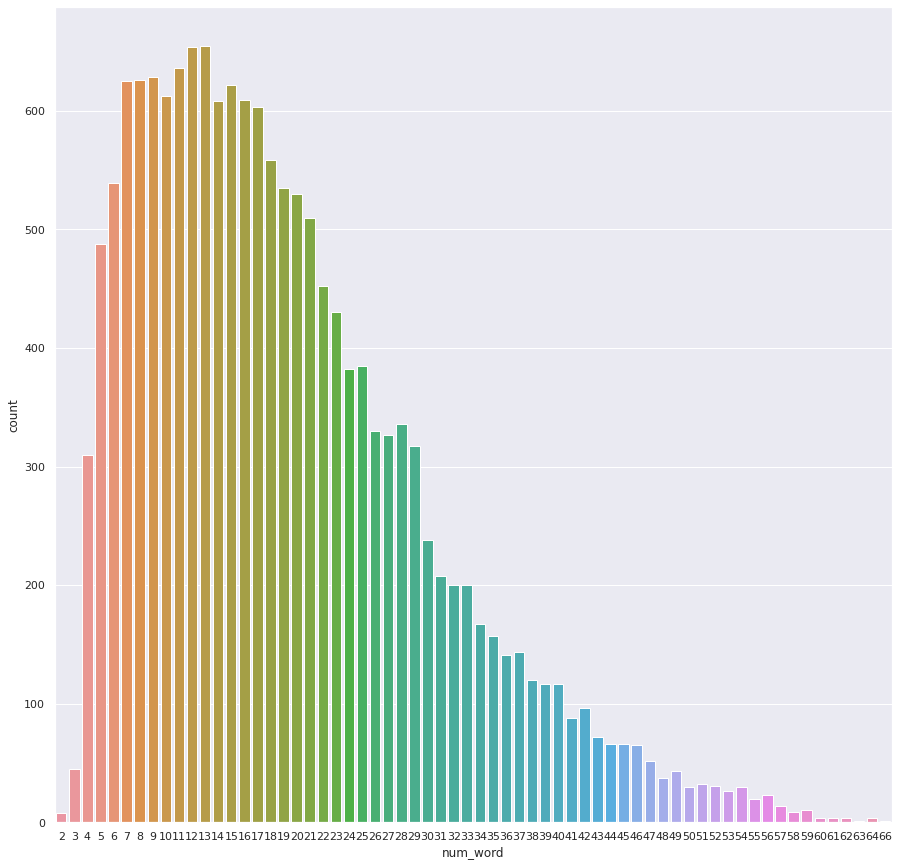

In [7]:
# #看每一段文字的字數分佈
df_num_word = pd.DataFrame(num_word, columns = ["num_word"])
df_num_word
#-------------------------------------------------------------------------
sns.set_theme(style = "darkgrid")
fig = plt.figure(figsize = (15,15))
ax = sns.countplot(x = 'num_word', data = df_num_word) 
plt.savefig("before_prepro_num_word_dist.png")
plt.show() 

In [10]:
#計算每一個字在全部資料出現的數量，並排序
all_word_dict = Counter(all_word)
#sorted(x.items(), key=lambda item: item[1])
sorted_all_word_dict = sorted(all_word_dict.items(), key = lambda item: item[1] ,reverse = True)
sorted_all_word_dict[0:200]

[('i', 25859),
 ('feel', 11183),
 ('and', 9589),
 ('to', 8972),
 ('the', 8370),
 ('a', 6200),
 ('feeling', 5112),
 ('that', 5112),
 ('of', 4990),
 ('my', 4283),
 ('in', 3433),
 ('it', 3127),
 ('like', 2908),
 ('so', 2527),
 ('for', 2431),
 ('im', 2430),
 ('me', 2309),
 ('but', 2255),
 ('was', 2227),
 ('have', 2224),
 ('is', 2184),
 ('this', 2088),
 ('am', 2082),
 ('with', 2015),
 ('not', 1827),
 ('about', 1795),
 ('be', 1778),
 ('as', 1565),
 ('on', 1551),
 ('you', 1471),
 ('just', 1391),
 ('at', 1376),
 ('when', 1367),
 ('or', 1246),
 ('all', 1174),
 ('because', 1157),
 ('more', 1123),
 ('do', 1066),
 ('can', 966),
 ('really', 942),
 ('up', 935),
 ('t', 897),
 ('are', 896),
 ('by', 886),
 ('very', 884),
 ('know', 853),
 ('been', 853),
 ('if', 809),
 ('out', 808),
 ('myself', 805),
 ('time', 794),
 ('how', 774),
 ('what', 773),
 ('get', 740),
 ('little', 736),
 ('had', 719),
 ('now', 705),
 ('will', 697),
 ('from', 689),
 ('being', 681),
 ('they', 673),
 ('people', 654),
 ('them', 651)

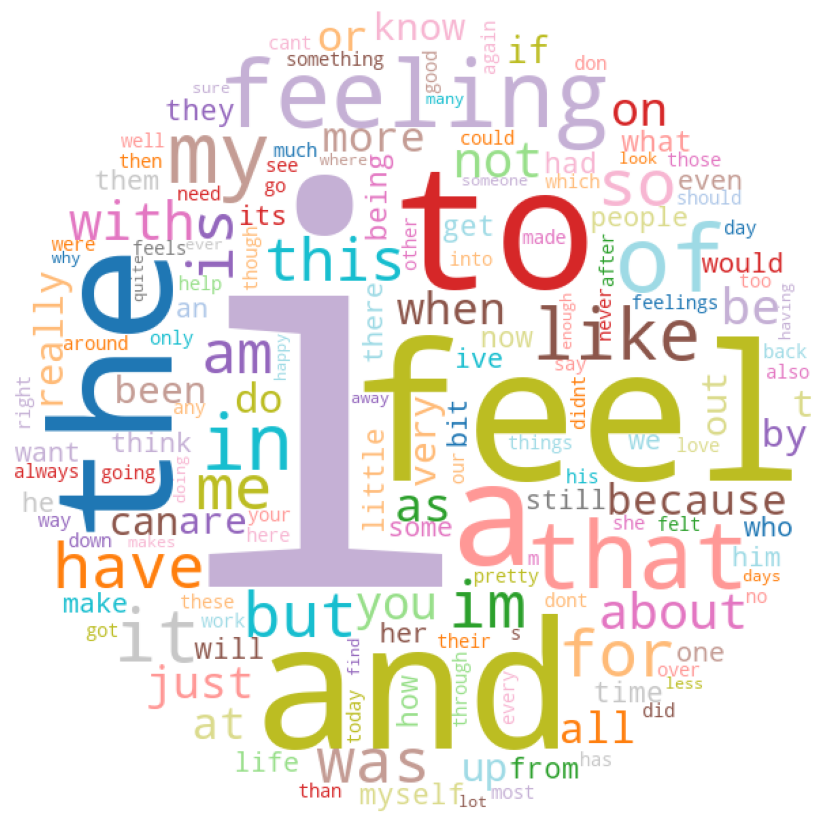

In [ ]:
#依照上一格結果，畫文字雲
#wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)
x, y = np.ogrid[:600, :600]

mask = (x - 300) ** 2 + (y - 300) ** 2 > 300 ** 2
mask = 255 * mask.astype(int)

pic = wordcloud.WordCloud(width=600, height=600, max_font_size = 400, min_font_size = 12, colormap = "tab20",
              background_color = "white", mask = mask, random_state = 10).generate_from_frequencies(all_word_dict)
# show
plt.figure(figsize = (15,15))
plt.imshow(pic)
plt.axis("off")
plt.savefig("before_prepro_wordcloud.png")
plt.show()

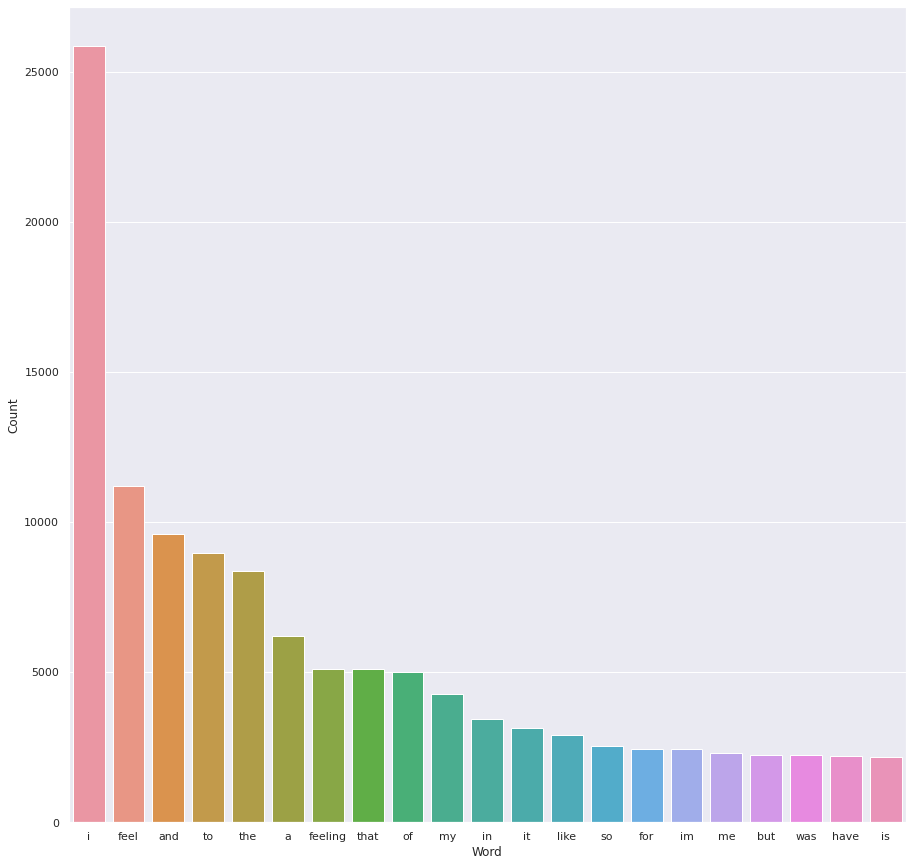

In [ ]:
# 詞語數量分布
word_fre = pd.DataFrame(list(sorted_all_word_dict),columns = ['Word','Count'])
word_fre
sns.set_theme(style = "darkgrid")
fig = plt.figure(figsize = (15,15))
ax = sns.barplot(x = word_fre.loc[0:20]["Word"], y = word_fre.loc[0:20]["Count"])
plt.savefig("before_prepro_wordcloud_count.png")
plt.show()

In [ ]:
# data preprocessing

In [ ]:
# 整合兩個套件的停用詞表
stopwords = list(wordcloud.STOPWORDS)
nltk_stopwords = list(sw.words('english')) #stopwords.words('english')
i = 0
while i < len(nltk_stopwords):
  if nltk_stopwords[i] not in stopwords:
    stopwords.append(nltk_stopwords[i])
  i = i + 1

i = 0
while i < len(stopwords):
  if "'" in stopwords[i] and "'t" not in stopwords[i]:
    stopwords[i] = stopwords[i].replace("'","")
  i = i + 1 

In [ ]:
## lemmatization 字型還原
## 只放入形容詞和副詞和動詞到新的 nested list 

# 獲取單詞的詞性  “n” for nouns, “v” for verbs, “a” for adjectives, “r” for adverbs
def get_wordnet_pos(tag):
  if tag.startswith('J'):
    return "a"
  elif tag.startswith('V'):
    return "v"
  elif tag.startswith('N'):
    return "n"
  elif tag.startswith('R'):
    return "r"
  else:
    return "n"

def lemma(tokens):
  tagged_sent = pos_tag(tokens)     # 獲取單詞詞性
  wnl = WordNetLemmatizer()
  lemmas_sent = []
  for tag in tagged_sent:
    if get_wordnet_pos(tag[1]) != "n":  #不放入名詞
      lemmas_sent.append(wnl.lemmatize(tag[0], pos = get_wordnet_pos(tag[1]))) # 詞形還原
  return lemmas_sent

lemma_nest_list = []
lemma_all_word = []
i = 0
while i < len(nest_list):
  lemma_nest_list.append(lemma(nest_list[i]))
  lemma_all_word.extend(lemma(nest_list[i]))
  i = i + 1

In [ ]:
#清除停用詞

no_sw_lemma_all_word = []
no_sw_lemma_nest_list = lemma_nest_list
no_sw_lemma_max_words = 0
num_word = []
zero_word_index = []

i = 0
while i < len(no_sw_lemma_nest_list):
  j = len(no_sw_lemma_nest_list[i]) - 1
  while j >= 0:
    if no_sw_lemma_nest_list[i][j] in stopwords:
      no_sw_lemma_nest_list[i].remove(no_sw_lemma_nest_list[i][j])
      j = j - 1
    else:
      j = j - 1
  if no_sw_lemma_max_words < len(no_sw_lemma_nest_list[i]):
    no_sw_lemma_max_words = len(no_sw_lemma_nest_list[i])
  
  if len(no_sw_lemma_nest_list[i]) == 0:
    zero_word_index.append(i)
  num_word.append(len(no_sw_lemma_nest_list[i]))
  no_sw_lemma_all_word.extend(no_sw_lemma_nest_list[i])
  i = i + 1

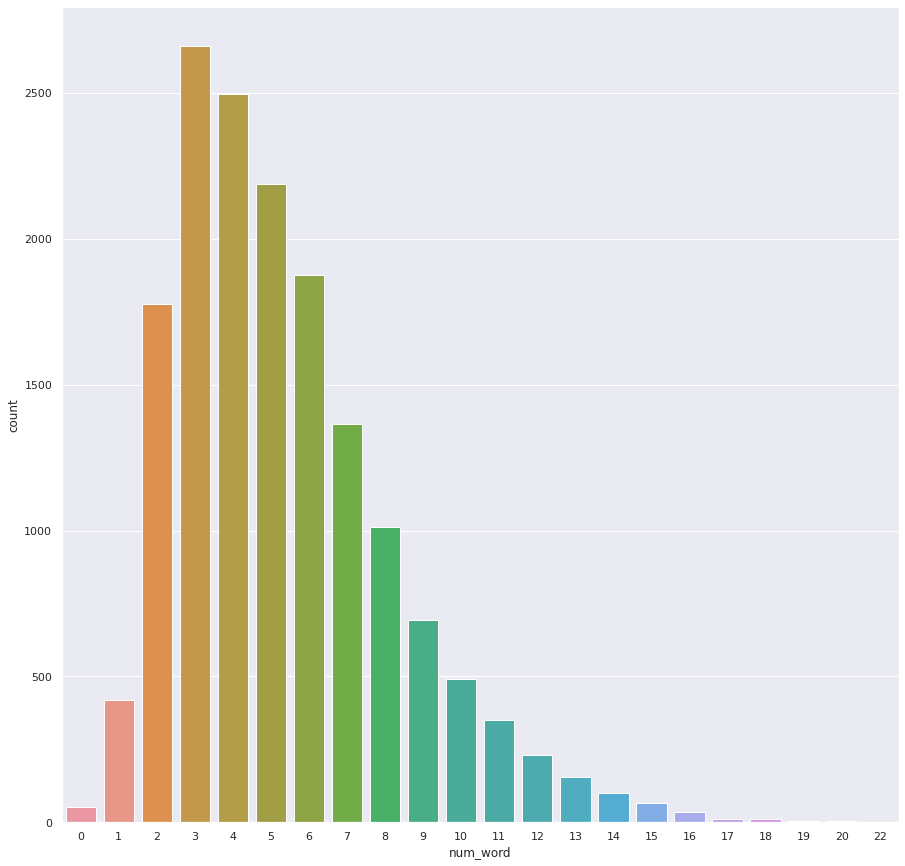

In [ ]:
#做 lemma 和 清除 stopword 以後的每一段文字的字數分佈
df_no_sw_lemma_num_word = pd.DataFrame(num_word, columns = ["num_word"])
#-------------------------------------------------------------------------
sns.set_theme(style = "darkgrid")
fig = plt.figure(figsize = (15,15))
ax = sns.countplot(x = 'num_word', data = df_no_sw_lemma_num_word) 
plt.savefig("after_prepro_num_word_dist.png")
plt.show() 

In [ ]:
new_col_name = []
i = 0
while i < no_sw_lemma_max_words:
  new_col_name.append("word" + str(i + 1))
  i = i + 1

#詞型還原和清除停用詞以後的詞語dataframe 
seg_words = pd.DataFrame(no_sw_lemma_nest_list, columns = new_col_name)
seg_words.loc[[34]][:]

,word1,word2,word3,word4,word5,word6,word7,word8,word9,word10,word11,word12,word13,word14,word15,word16,word17,word18,word19,word20,word21,word22
34,imagine,real,emotionally,connect,enough,feel,totally,accepted,safe,morally,acceptable,close,prolonged,physical,win,expect,subsequently,None,None,None,None,None


In [ ]:
#計算每一個字在詞型還原和清除停用詞以後出現的數量，並排序
new_all_word_dict = Counter(no_sw_lemma_all_word)
new_sorted_all_word_dict = sorted(new_all_word_dict.items(), key = lambda item: item[1] ,reverse=True)

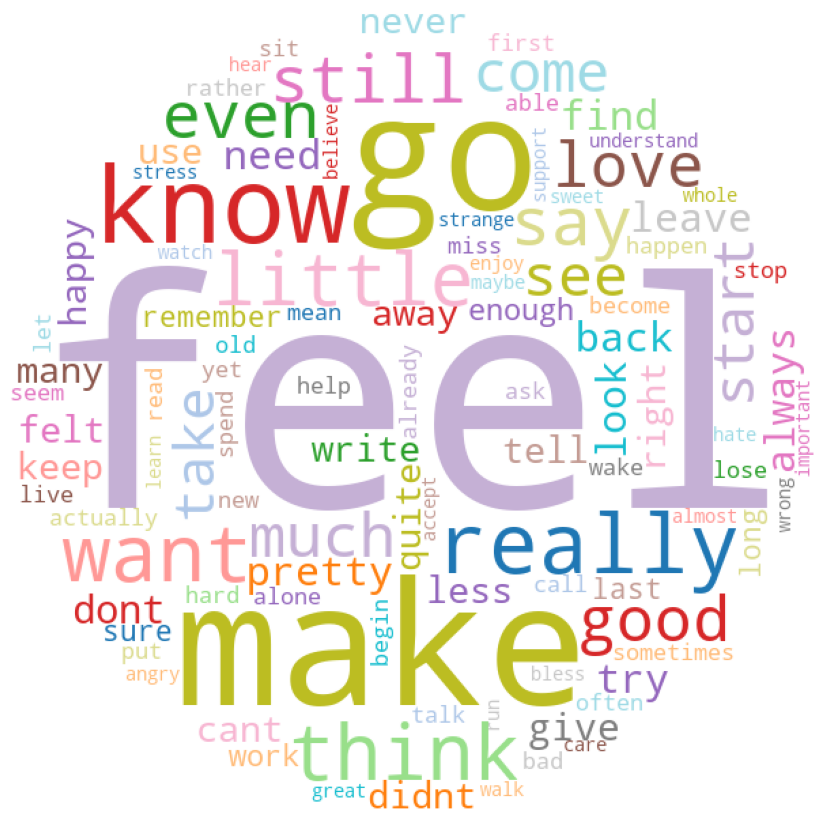

In [ ]:
#依照上一格結果，畫文字雲
#wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)
x, y = np.ogrid[:600, :600]

mask = (x - 300) ** 2 + (y - 300) ** 2 > 300 ** 2
mask = 255 * mask.astype(int)

pic = wordcloud.WordCloud(width=600, height=600, max_font_size = 400, min_font_size = 12, colormap = "tab20",
                background_color="white",mask = mask, random_state = 10).generate_from_frequencies(new_all_word_dict)
# show
plt.figure(figsize = (15,15))
plt.imshow(pic)
plt.axis("off")
plt.savefig("after_prepro_wordcloud.png")
plt.show()

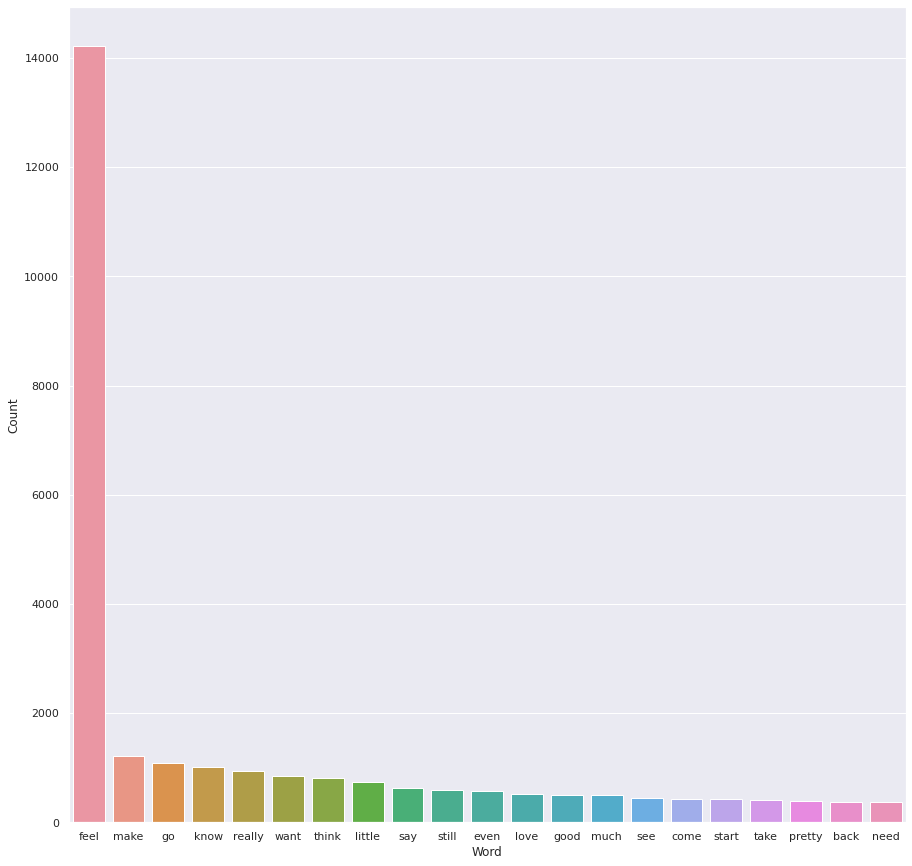

In [ ]:
#做 lemma 和 清除 stopword 以後的詞語數量分佈
new_word_fre = pd.DataFrame(list(new_sorted_all_word_dict),columns = ['Word','Count'])
sns.set_theme(style = "darkgrid")
fig = plt.figure(figsize = (15,15))
ax = sns.barplot(x = new_word_fre.loc[0:20]["Word"], y = new_word_fre.loc[0:20]["Count"])
plt.savefig("after_prepro_wordcloud_count.png")
plt.show()

In [ ]:
#def idf(word):#inverse document frequency 
#  df = clean_seg_words.isin([word])
#  true_false = df.any(axis = 1).tolist()
#  want_index = []
#  i = 0
#  while i < len(true_false):
#    if true_false[i] == True: 
#      want_index.append(i)
#    i = i + 1
#  return round(np.log10((1 + new_num_index)/(1 + len(want_index))),8)

#def idf(word):#inverse document frequency 
#  want_index = []
#  i = 0
#  while i < new_num_index:
#    if word in clean_seg_words.loc[i].tolist(): 
#      want_index.append(i)
#    i = i + 1
#  return round(np.log10((1 + new_num_index)/(1 + len(want_index))),8)


## 利用 tf-idf 提取關鍵字，做後續分析
unique_word = list(new_all_word_dict.keys())
new_num_index = len(seg_words.index.tolist())

def tf(word, counter):
  return round((counter[word] / sum(counter.values())),8)

def idf(word):#inverse document frequency 
  df = seg_words.isin([word])
  true_false = df.any(axis = 1).tolist()
  true_false = Counter(true_false)
  return round(np.log10((new_num_index)/(true_false[True])),8)

def tfidf(word, counter):
  return round(tf(word, counter) * idf(word),8)

#tf('didnt',new_all_word_dict), idf('didnt'), tfidf('didnt',new_all_word_dict)
unique_word_tfidf = []
i = 0
while i < len(unique_word):
  unique_word_tfidf.append(tfidf(unique_word[i],new_all_word_dict))
  i = i + 1

In [ ]:
# 排序每一個詞和其tfidf值 ， 並與詞型還原和清除停用詞以後的結果比較
uni_word_tfidf_dict = dict(zip(unique_word, unique_word_tfidf))
sort_uni_word_tfidf_dict = sorted(uni_word_tfidf_dict.items(), key = lambda item: item[1] ,reverse=True)
new_sorted_all_word_dict[0:15], sort_uni_word_tfidf_dict[0:15]

([('feel', 14225),
  ('make', 1220),
  ('go', 1082),
  ('know', 1017),
  ('really', 942),
  ('want', 856),
  ('think', 817),
  ('little', 736),
  ('say', 621),
  ('still', 595),
  ('even', 571),
  ('love', 514),
  ('good', 509),
  ('much', 496),
  ('see', 449)],
 [('make', 0.01645736),
  ('go', 0.01528797),
  ('know', 0.01459151),
  ('really', 0.01396598),
  ('want', 0.01310967),
  ('think', 0.01255453),
  ('feel', 0.01234038),
  ('little', 0.0117497),
  ('say', 0.01041275),
  ('still', 0.0100435),
  ('even', 0.00980226),
  ('love', 0.00928389),
  ('good', 0.00906794),
  ('much', 0.00886246),
  ('see', 0.00827885)])

In [ ]:
# 觀察前15筆資料，發現tfidf提取出來的關鍵字，與依照詞彙數量排序的關鍵字，幾乎相同。 
# 詞彙數量與TF有正比關係，此結果代表TF 仍是主要影響 tfidf 數值的結果， 所以我調整 idf 的 權重， 觀察是否對提取關鍵字有所幫助。
def new_idf(word):
  return round(idf(word) * (6 ** round(idf(word))),8) # 6 

def new_tfidf(word, counter):
  return round(tf(word, counter) * new_idf(word),8)

uni_word_new_tfidf = []
i = 0
while i < len(unique_word):
  uni_word_new_tfidf.append(new_tfidf(unique_word[i],new_all_word_dict))
  i = i + 1

In [ ]:
# 排序每一個詞和其tfidf值 ， 並與詞型還原和清除停用詞以後的結果比較
uni_word_new_tfidf_dict = dict(zip(unique_word, uni_word_new_tfidf))
sort_uni_word_new_tfidf_dict = sorted(uni_word_new_tfidf_dict.items(), key = lambda item: item[1] ,reverse=True)
new_sorted_all_word_dict[0:20], sort_uni_word_new_tfidf_dict[0:20]

([('feel', 14225),
  ('make', 1220),
  ('go', 1082),
  ('know', 1017),
  ('really', 942),
  ('want', 856),
  ('think', 817),
  ('little', 736),
  ('say', 621),
  ('still', 595),
  ('even', 571),
  ('love', 514),
  ('good', 509),
  ('much', 496),
  ('see', 449),
  ('come', 425),
  ('start', 421),
  ('take', 409),
  ('pretty', 386),
  ('back', 378)],
 [('love', 0.33421994),
  ('crappy', 0.33169074),
  ('innocent', 0.3305331),
  ('smart', 0.3305331),
  ('false', 0.32901965),
  ('ur', 0.32901965),
  ('good', 0.32644585),
  ('rush', 0.32417503),
  ('devastate', 0.32241103),
  ('violent', 0.3212261),
  ('forget', 0.3212261),
  ('conservative', 0.32016769),
  ('closer', 0.32016769),
  ('secretly', 0.32016769),
  ('knit', 0.32016769),
  ('married', 0.32016769),
  ('quick', 0.32016769),
  ('insist', 0.32016769),
  ('chinese', 0.32016769),
  ('quote', 0.32016769)])

In [ ]:
# 如果一句話超過 11 個單字 ， 刪除tfidf較低的字 

def remove_word_by_tfidf(list):
  if 10 < len(list):
    k = 0
    word_tfidf = [] 
    while k < len(list):
      l = 0
      while l < len(sort_uni_word_new_tfidf_dict):
        if list[k] == sort_uni_word_new_tfidf_dict[l][0]:
          word_tfidf.append(sort_uni_word_new_tfidf_dict[l])
        l = l + 1
      k = k + 1
    word_tfidf.sort(key = lambda x: x[1], reverse=True) #list_students.sort(key = lambda x: x[1], reverse=True)
    if len(list) <= 19: #no_sw_lemma_nest_list[11400] = list
      wanted_num = int(round((0.5 * len(list)),0))
    if len(list) > 19: #no_sw_lemma_nest_list[11400] = list
      wanted_num = 10
    word_tfidf = word_tfidf[0:wanted_num]
    return word_tfidf

after_tf_idf_nest_list = []
after_tf_idf_all_word = []
# 不保持順序
i = 0 
while i < len(no_sw_lemma_nest_list):
  tuple_list = remove_word_by_tfidf(no_sw_lemma_nest_list[i])
  if len(no_sw_lemma_nest_list[i]) > 10:
    m = 0
    temp = []
    while m < len(tuple_list): # word_tfidf = remove_word_by_tfidf(list)
      temp.append(tuple_list[m][0])
      after_tf_idf_all_word.extend(temp)
      m = m + 1
    after_tf_idf_nest_list.append(temp)
  else:
    after_tf_idf_all_word.extend(no_sw_lemma_nest_list[i])
    after_tf_idf_nest_list.append(no_sw_lemma_nest_list[i])
  i = i + 1    

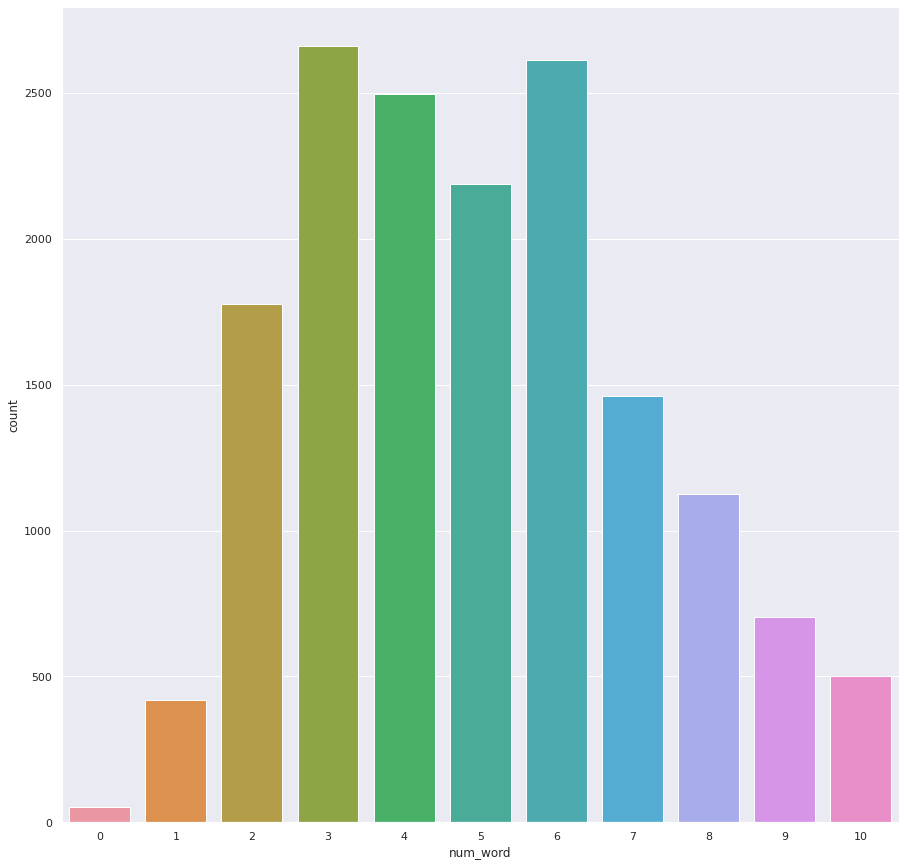

In [ ]:
#tfidf 提取關鍵字以後，每一段文字的字數分佈
tf_idf_num_word = []
i = 0
while i < len(after_tf_idf_nest_list):
  tf_idf_num_word.append(len(after_tf_idf_nest_list[i]))
  i = i + 1

df_tf_idf_num_word = pd.DataFrame(tf_idf_num_word, columns = ["num_word"])
df_tf_idf_num_word
#-------------------------------------------------------------------------
sns.set_theme(style = "darkgrid")
fig = plt.figure(figsize = (15,15))
ax = sns.countplot(x = 'num_word', data = df_tf_idf_num_word) 
plt.savefig("after_tfidf_num_word_dist.png")
plt.show() 

In [ ]:
col_name = []
i = 0
while i < 10:
  col_name.append("word" + str(i+1))
  i = i + 1

#tfidf 以後的詞語dataframe 
clean_seg_words = pd.DataFrame(after_tf_idf_nest_list, columns = col_name)
clean_seg_words

,word1,word2,word3,word4,word5,word6,word7,word8,word9,word10
0,didnt,humiliate,None,None,None,None,None,None,None,None
1,go,feel,hopeless,damned,hopeful,care,awake,None,None,None
2,grab,post,wrong,None,None,None,None,None,None,None
3,feel,nostalgic,know,still,None,None,None,None,None,None
4,feel,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
15995,brief,say,anna,feel,beat,None,None,None,None,None
15996,turn,feel,pathetic,still,wait,sub,None,None,None,None
15997,feel,strong,good,None,None,None,None,None,None,None
15998,feel,rude,None,None,None,None,None,None,None,None


In [ ]:
counter = Counter(after_tf_idf_all_word) 
unique_word = list(counter.keys())

# 將所有word 變成 feature
def get_dummy(list_):
  list_counter = Counter(list_) #list = after_tf_idf_nest_list[j]
  list_counter = list(list_counter.items())
  index = []
  i = 0
  while i < len(list_counter): #list.index(element)
    index.append(unique_word.index(list_counter[i][0]))
    i = i + 1 
  count_list = [0] * len(unique_word)
  i = 0
  while i < len(index):
    count_list[index[i]] = list_counter[i][1] 
    i = i + 1
  return count_list
count_nest_list = []
j = 0
while j < len(after_tf_idf_nest_list):
  count_nest_list.append(get_dummy(after_tf_idf_nest_list[j]))
  j = j + 1
dummy = pd.DataFrame(count_nest_list, columns = unique_word)
dummy

,didnt,humiliate,go,feel,hopeless,damned,hopeful,care,awake,grab,...,riotousrambling,spain,portugal,philosophical,terrorise,forsake,squirm,aunty,saved,braeden
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15996,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15997,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15998,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dummy.to_csv("tfidf_train_dummy.csv")